Question -1

Question: Given a DataFrame containing information about sales transactions, perform the following tasks:

1.Create a new column 'Total' that calculates the total sale amount (Quantity * Price).

2.Group the data by 'Category' and find the average 'Total' for each category.

3.Filter the results to show only categories with an average total sale greater than 1000.

4.Sort the results in descending order of the average total sale.

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
np.random.seed(42)

data = {
    'Data':pd.date_range(start='2023-01-01',periods=100, freq='D'),
    'categories':np.random.choice(['Electronics', 'Clothing', 'Books', 'Home & Kitchen'],100),
    'Product':[f'Product_{i}'for i in range(1,101)],
    'Quantity':np.random.randint(1,10,100),
    'Price':np.random.uniform(10,50,100).round(2)
    }

df =pd.DataFrame(data)
print(df.head())
df.to_csv('sales_data.csv',index=False)

        Data      categories    Product  Quantity  Price
0 2023-01-01           Books  Product_1         2  49.91
1 2023-01-02  Home & Kitchen  Product_2         2  20.67
2 2023-01-03     Electronics  Product_3         4  49.06
3 2023-01-04           Books  Product_4         8  26.44
4 2023-01-05           Books  Product_5         7  11.32


In [ ]:
# 1.Create a new column 'Total' that calculates the total sale amount (Quantity * Price).
# 2.Group the data by 'Category' and find the average 'Total' for each category.

df['Total'] = df['Quantity'] * df['Price']
Category_avg =df.groupby('categories')['Total'].mean().reset_index()
print(Category_avg)

       categories       Total
0           Books  132.692500
1        Clothing  154.299615
2     Electronics  213.457000
3  Home & Kitchen  183.524333


In [ ]:
#3.Filter the results to show only categories with an average total sale greater than 1000.

filtered_categ=Category_avg[Category_avg['Total']>1000]
filtered_categ

,categories,Total
0,Books,132.692500
1,Clothing,154.299615
2,Electronics,213.457000
3,Home & Kitchen,183.524333


4.Sort the results in descending order of the average total sale.

In [ ]:
result_type =filtered_categ.sort_values(by='Total',ascending=False)
result_type

,categories,Total
2,Electronics,213.457000
3,Home & Kitchen,183.524333
1,Clothing,154.299615
0,Books,132.692500


Question 2

1.Extract the Month-Year from the Date column.

2.Group the data by Month-Year and sum the Sales.

3.Plot a bar chart to visualize the total sales per Month-Year.

You can use any plotting library like matplotlib or seaborn.

In [ ]:
import pandas as pd

# Dummy data
data = {
    'Date': ['2022-01-15', '2022-02-20', '2022-03-25', '2022-04-30', '2022-05-10',
             '2022-06-15', '2022-07-20', '2022-08-25', '2022-09-30', '2022-10-05'],
    'Sales': [200, 220, 250, 300, 150, 310, 400, 280, 500, 320]
}
df = pd.DataFrame(data)
#1. Extract the Month-Year from the Date column.
df['Date']=pd.to_datetime(df['Date'])
df['Month-Year']=df['Date'].dt.to_period('M')
print(df)

        Date  Sales Month-Year
0 2022-01-15    200    2022-01
1 2022-02-20    220    2022-02
2 2022-03-25    250    2022-03
3 2022-04-30    300    2022-04
4 2022-05-10    150    2022-05
5 2022-06-15    310    2022-06
6 2022-07-20    400    2022-07
7 2022-08-25    280    2022-08
8 2022-09-30    500    2022-09
9 2022-10-05    320    2022-10


  Month-Year  Sales
0    2022-01    200
1    2022-02    220
2    2022-03    250
3    2022-04    300
4    2022-05    150
5    2022-06    310
6    2022-07    400
7    2022-08    280
8    2022-09    500
9    2022-10    320


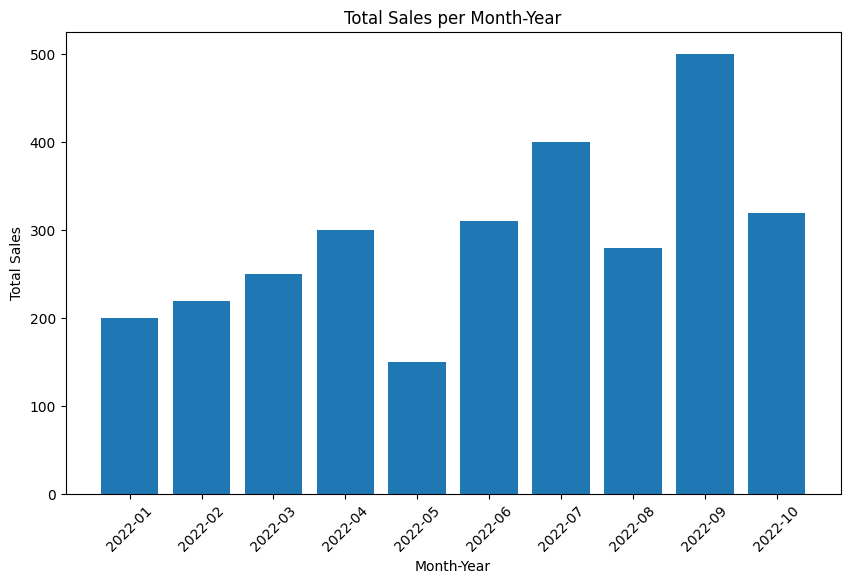

In [ ]:
import matplotlib.pyplot as plt

#2.Group the data by Month-Year and sum the Sales.
#3.Plot a bar chart to visualize the total sales per Month-Year.

grouped_sales = df.groupby('Month-Year')['Sales'].sum().reset_index()
print(grouped_sales)

plt.figure(figsize=(10,6))
plt.bar(grouped_sales['Month-Year'].astype(str),grouped_sales['Sales'])
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.title('Total Sales per Month-Year')
plt.xticks(rotation=45)
plt.show()

Question -3
Tasks:

1.Identify the missing values in the DataFrame.

2.Replace missing values in the Age column with the mean age.

3.Drop rows where all values are missing.

4.Fill missing Score values with the forward fill method.

5.Verify that there are no missing values left in the DataFrame.

In [ ]:
import pandas as pd
import numpy as np

data = {'Name': ['Alice', 'Bob', np.nan, 'David', 'Eve'],
        'Age': [25, np.nan, 30, 22, np.nan],
        'Score': [85.5, 90.2, np.nan, 88.0, 91.5]}
df = pd.DataFrame(data)


In [ ]:
#1.Identify the missing values in the DataFrame.
df['Score'].fillna(method='ffill')
#.Replace missing values in the Age column with the mean age.
df['Age'].fillna(df['Age'].mean(),inplace=True)
df

<ipython-input-43-e4d1f07045b3>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Score'].fillna(method='ffill')
<ipython-input-43-e4d1f07045b3>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


,Name,Age,Score
0,Alice,25.000000,85.5
1,Bob,25.666667,90.2
2,NaN,30.000000,90.2
3,David,22.000000,88.0
4,Eve,25.666667,91.5


In [ ]:
#3.Drop rows where all values are missing.
df.dropna(axis=0,inplace=True)

Question 4

1.Perform an inner join on the two DataFrames using the Employee column.

2.Perform a left join to include all employees from df1.

3.Perform a right join to include all employees from df2.

4.Perform a full outer join to include all employees from both DataFrames.

5.Identify employees who appear in both DataFrames.

In [2]:
import pandas as pd


data1 = {'Employee': ['Alice', 'Bob', 'Charlie', 'David'],
         'Department': ['HR', 'IT', 'Finance', 'HR'],
         'Salary': [50000, 60000, 55000, 52000]}

data2 = {'Employee': ['Charlie', 'David', 'Eve', 'Frank'],
         'Bonus': [3000, 4000, 3500, 5000]}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

In [3]:
# 1.Perform an inner join on the two DataFrames using the Employee column.

a=['inner','left','right','outer']
pd.merge(df1,df2,on='Employee',how=a[1])

,Employee,Department,Salary,Bonus
0,Alice,HR,50000,NaN
1,Bob,IT,60000,NaN
2,Charlie,Finance,55000,3000.0
3,David,HR,52000,4000.0


In [6]:
# 2.Perform a left join to include all employees from df1.
pd.merge(df1,df2,on='Employee',how=a[1])
# 3.Perform a right join to include all employees from df2.

# 4.Perform a full outer join to include all employees from both DataFrames.
# 5.Identify employees who appear in both DataFrames.
df1[df1['Employee'].isin(df2['Employee'])]


,Employee,Department,Salary
2,Charlie,Finance,55000
3,David,HR,52000


Question 5

1.Split the Product column into two new columns: Product_Type and Brand.

In [30]:
data = {'Product': ['Laptop - HP', 'Phone - Samsung', 'Tablet - Apple', 'Monitor - Dell'],
        'Price': [1000, 800, 1200, 600]}
df = pd.DataFrame(data)
df

,Product,Price
0,Laptop - HP,1000
1,Phone - Samsung,800
2,Tablet - Apple,1200
3,Monitor - Dell,600


In [31]:
df[['Product','Brand']]=df['Product'].str.split(' - ',expand=True)

In [26]:
df

,Product,Price,Brand
0,Laptop,1000,HP
1,Phone,800,Samsung
2,Tablet,1200,Apple
3,Monitor,600,Dell


Question -6

1.Create a pivot table that shows the total sales made by each salesperson, for each product.

In [34]:
import pandas as pd

data = {
    'Salesperson': ['Alice', 'Bob', 'Alice', 'Bob', 'Charlie', 'Charlie', 'Alice', 'Charlie'],
    'Region': ['East', 'East', 'West', 'West', 'East', 'West', 'East', 'West'],
    'Product': ['Laptop', 'Laptop', 'Tablet', 'Laptop', 'Tablet', 'Tablet', 'Laptop', 'Laptop'],
    'Sales': [1000, 1500, 1200, 1800, 1300, 1600, 1100, 1700]
}

df = pd.DataFrame(data)
df

,Salesperson,Region,Product,Sales
0,Alice,East,Laptop,1000
1,Bob,East,Laptop,1500
2,Alice,West,Tablet,1200
3,Bob,West,Laptop,1800
4,Charlie,East,Tablet,1300
5,Charlie,West,Tablet,1600
6,Alice,East,Laptop,1100
7,Charlie,West,Laptop,1700


In [38]:
pivot_tables_result=pd.pivot_table(df,values='Sales',index='Salesperson',columns=['Product','Region'],aggfunc='sum')
pivot_tables_result

Product      Laptop          Tablet        
Region         East    West    East    West
Salesperson                                
Alice        2100.0     NaN     NaN  1200.0
Bob          1500.0  1800.0     NaN     NaN
Charlie         NaN  1700.0  1300.0  1600.0

Question -7

Given the DataFrame 'df' and the 'city_tier' dictionary, perform the following tasks:

For the 'age' column, use map() with a lambda function or any method u like to categorize ages as follows:
Below 25: 'Junior'
25 to 35: 'Mid-level'
Above 35: 'Senior'
Handle NaN values by assigning them to 'Unknown'

In [39]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank'],
    'age': [25, 30, np.nan, 28, 22, 40],
    'city': ['New York', 'San Francisco', 'London', 'Paris', 'Tokyo', 'Berlin'],
    'salary': [60000, 80000, 75000, np.nan, 65000, 90000]
}

df = pd.DataFrame(data)

In [ ]:
df['salary'].fillna("unknown",inplace=True)
